# Bagging & Boosting KNN & Stacking Practical Questions

#Question 1 : What is the fundamental idea behind ensemble techniques? How doesbagging differ from boosting in terms of approach and objective?

# Answer:
### Fundamental Idea Behind Ensemble Techniques

**Ensemble techniques** in machine learning are based on the principle that combining multiple models (often called **base learners** or **weak learners**) can produce a **more accurate and robust** predictive model than any individual model alone.

The **key idea** is:

> **"The wisdom of the crowd":** Multiple diverse models, when combined properly, can correct each other's errors and reduce overall variance and/or bias.


### Bagging vs. Boosting

| Aspect                    | **Bagging** (Bootstrap Aggregating)                                                                                | **Boosting**                                                                                       |
| ------------------------- | ------------------------------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------------- |
| **Objective**             | Reduce **variance** and prevent overfitting                                                                        | Reduce **bias** (and sometimes variance)                                                           |
| **Approach**              | Train multiple models **independently** in parallel on different **random subsets** of the data (with replacement) | Train models **sequentially**, where each model **focuses on the errors** made by the previous one |
| **Data Sampling**         | Uses **bootstrap sampling** (random samples with replacement)                                                      | Uses the **entire dataset**, but reweights data points based on previous errors                    |
| **Model Dependency**      | Models are **independent**                                                                                         | Models are **dependent**, each one learns from the last                                            |
| **Combining Predictions** | Uses **majority voting** (for classification) or **averaging** (for regression)                                    | Uses a **weighted sum** of all models (stronger models get more weight)                            |
| **Common Algorithms**     | Random Forest                                                                                                      | AdaBoost, Gradient Boosting, XGBoost                                                               |



#Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

# Answer:
### How Random Forest Reduces Overfitting Compared to a Single Decision Tree

A **single decision tree** is prone to **overfitting**, especially when it grows deep and tries to perfectly fit the training data. This results in high variance and poor generalization on unseen data.

A **Random Forest Classifier** reduces overfitting by combining many decision trees in an ensemble using **bagging** (bootstrap aggregating) and **random feature selection**. Here's how:



### Key Mechanisms:

1. **Bagging (Bootstrap Aggregating):**

   * Each tree is trained on a **random subset of the training data** (with replacement).
   * This creates **diverse trees** that see different data, reducing the risk that all trees overfit to the same patterns.
   * The final prediction is made by **majority voting** (classification) or **averaging** (regression), which smooths out errors of individual trees.

2. **Random Feature Selection at Each Split:**

   * Instead of considering **all features** when splitting a node, each tree considers a **random subset of features**.
   * This reduces **correlation** between trees and increases diversity, which helps prevent overfitting.



### Two Key Hyperparameters That Help Control Overfitting

1. **`n_estimators` (Number of Trees):**

   * More trees = better averaging = reduced variance.
   * However, too many trees increase computation without much gain after a point.
   * Helps **stabilize the predictions** and reduce overfitting by averaging out the noise.

2. **`max_features` (Number of Features Considered at Each Split):**

   * Controls how many features are considered when looking for the best split.
   * Lower values increase diversity between trees, reducing correlation and thus **overfitting**.
   * Common defaults:

     * Classification: `sqrt(n_features)`
     * Regression: `n_features / 3`


# Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.


# Answer:
### What is **Stacking** in Ensemble Learning?

**Stacking** (short for **stacked generalization**) is an **ensemble learning technique** where multiple different models (**base learners**) are trained, and a **meta-model** (or **meta-learner**) is used to combine their predictions.

* Instead of simply voting (like in bagging) or sequential learning (like in boosting), stacking **learns how to best combine** the outputs of various base models.
* The goal is to **leverage the strengths** of different models to improve overall predictive performance.



### How Stacking Works (High-Level Steps):

1. **Train multiple base models** (e.g., decision tree, logistic regression, SVM) on the training data.
2. **Generate predictions** from each base model on a validation set.
3. Use these predictions as **input features** to train a **meta-model** (often a simple model like logistic regression or linear regression).
4. The meta-model learns how to **combine the base predictions** into a final prediction.



### How Stacking Differs from Bagging/Boosting

| Aspect                 | **Stacking**                                                                                         | **Bagging**                                                       | **Boosting**                                                                  |
| ---------------------- | ---------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------- | ----------------------------------------------------------------------------- |
| **Model Training**     | Base models are trained **independently**, and a separate **meta-model** is trained on their outputs | Multiple models trained in **parallel** on random subsets of data | Models trained **sequentially**, each one corrects the errors of the previous |
| **Model Diversity**    | Often uses **different types** of models (e.g., tree, SVM, NN)                                       | Typically uses the **same base model** (e.g., decision trees)     | Typically uses the **same base model**                                        |
| **Combination Method** | Uses a **meta-model** to learn the best combination                                                  | Uses **voting or averaging**                                      | Uses a **weighted sum**                                                       |
| **Objective**          | Learn optimal combination of diverse models                                                          | Reduce variance                                                   | Reduce bias and/or variance                                                   |



### Simple Example Use Case

**Problem:** Predict customer churn (binary classification)

**Stacking Setup:**

* **Base models:**

  * Logistic Regression
  * Random Forest
  * Gradient Boosting
  * K-Nearest Neighbors
* **Meta-model:**

  * Logistic Regression (trained on the outputs of the base models)

**Why use stacking here?**

* Each base model may capture different patterns (e.g., Random Forest captures nonlinear interactions, Logistic Regression is good for linear trends).
* The meta-model learns to **weigh each model’s prediction** based on its strengths, leading to improved overall accuracy.



# Question 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?


# Answer:
### What is the **OOB Score** in Random Forest?

**OOB (Out-of-Bag) Score** is an internal **model evaluation metric** used in **Random Forests**. It provides an **unbiased estimate of model accuracy** without needing a separate validation set.



### How It Works:

* In Random Forest, each decision tree is trained on a **bootstrap sample** — a random sample **with replacement** from the original training data.
* On average, about **63%** of the data points are used in each bootstrap sample.
* The remaining **~37%** of the data — **not used** in training a particular tree — is called the **Out-of-Bag (OOB) data** for that tree.


### OOB Score Calculation:

1. For each data point:

   * Identify the trees for which this point was **OOB** (i.e., not included in that tree’s training).
   * Get predictions for this point from those trees only.
2. **Aggregate** those predictions (e.g., majority vote for classification).
3. Compare aggregated prediction with the true label.
4. Calculate overall **accuracy** (or another metric) across all data points using only their **OOB predictions**.



### Why OOB Score is Useful

 **No Need for a Separate Validation Set**

* Since the OOB score uses unused data for each tree, you can estimate accuracy **without splitting** your training data, making full use of the dataset.

 **Unbiased Performance Estimate**

* Because each prediction comes from trees that **haven’t seen** the corresponding data point, it's similar in spirit to cross-validation — providing a **realistic** generalization estimate.

 **Faster and Simpler Evaluation**

* OOB scoring is built into Random Forest training and requires **no additional computation or manual splitting**.


#Question 5: Compare AdaBoost and Gradient Boosting in terms of: ● How they handle errors from weak learners ● Weight adjustment mechanism ● Typical use cases

# Answer:

###  **1. How They Handle Errors from Weak Learners**

| **AdaBoost**                                                                                     | **Gradient Boosting**                                                                                       |
| ------------------------------------------------------------------------------------------------ | ----------------------------------------------------------------------------------------------------------- |
| Focuses on **misclassified samples** from previous models.                                       | Focuses on the **residual errors** (the difference between actual and predicted values).                    |
| Each new weak learner is trained to better classify the samples the previous learners got wrong. | Each new model tries to **minimize a loss function** by fitting to the gradient of the loss (i.e., errors). |
| Learners are added **sequentially**, each correcting mistakes of the last.                       | Also sequential, but more like a **gradient descent optimization** in function space.                       |



###  **2. Weight Adjustment Mechanism**

| **AdaBoost**                                                                                                                     | **Gradient Boosting**                                                                                                                          |
| -------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| Adjusts the **weights of training samples**: increases weights of misclassified instances so they influence the next model more. | No weight adjustment on training data points. Instead, each new learner is trained to fit the **residuals (errors)** of the combined ensemble. |
| Learners are assigned **weights** based on their accuracy — better learners have more say in final prediction.                   | Learners are combined using a **learning rate** (also called shrinkage) that controls how much each learner contributes.                       |



###  **3. Typical Use Cases**

| **AdaBoost**                                                                                                                                                | **Gradient Boosting**                                                                                                                                                                                |
| ----------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| - Best with **clean data**, low noise. <br> - Effective for **binary classification** problems. <br> - Often used with **decision stumps** (shallow trees). | - More flexible and robust to noisy data. <br> - Used for **regression and classification**. <br> - Powerful models like **XGBoost**, **LightGBM**, and **CatBoost** are based on gradient boosting. |


# Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables

# Answer:
 ### Why **CatBoost** Performs Well on Categorical Features Without Extensive Preprocessing

**CatBoost** (short for *Categorical Boosting*) is specifically designed to handle **categorical features natively**, **without the need for manual preprocessing** like one-hot encoding or label encoding.

This gives CatBoost two key advantages:

* **Less preprocessing** effort
* **Better model accuracy and generalization** on categorical data



###  How CatBoost Handles Categorical Variables

CatBoost uses a technique called **"ordered target statistics"** (also known as **ordered boosting**) combined with **permutation-based encoding**. Here's how it works:



####  **1. Ordered Target Encoding (Smoothed Mean Encoding)**

* For each categorical feature, CatBoost replaces categories with **statistical values**, like the **mean of the target variable** for that category.
* To prevent **target leakage**, it uses an **ordered scheme**:

  * For each data point, the encoding is based only on **previous data points**, not the current or future ones.
* This avoids the problem of using target information the model shouldn't have access to.

 **Example**:
If you're encoding the feature `City`, instead of using the average target value across **all** rows with the same city (which causes leakage), CatBoost:

* Randomly permutes the data.
* Calculates the mean target **only on previous occurrences** of the category for each row.


####  **2. Multiple Encodings and Combinations**

* CatBoost can automatically generate and use **combinations** of categorical features.
* It applies different statistics (mean target, frequency, etc.) for encoding.
* It learns the **best transformation** during training — no need to manually engineer combinations.


####  **3. Built-in Handling of High-Cardinality Features**

* Unlike one-hot encoding (which becomes sparse and inefficient), CatBoost handles **high-cardinality features** (like user IDs, product names) efficiently with **dense numerical representations**.
* This reduces overfitting and improves speed/memory use.



###  Benefits of CatBoost’s Categorical Handling

* No need for manual encoding (like one-hot or label encoding)
* Prevents **target leakage** with ordered encoding
* Works well with **high-cardinality** categorical features
* Improves model accuracy and reduces overfitting



# Bagging & Boosting KNN & Stacking Theory Questions

In [3]:
# Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization Task: 1. Load the Wine dataset (sklearn.datasets.load_wine()). 2. Split data into 70% train and 30% test. 3. Train a KNN classifier (default K=5) without scaling and evaluate using: a. Accuracy b. Precision, Recall, F1-Score (print classification report) 4. Apply StandardScaler, retrain KNN, and compare metrics. 5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric (Euclidean, Manhattan). 6. Train the optimized KNN and compare results with the unscaled/scaled versions.

# Answer:
# Import required libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Step 2: Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Train KNN (K=5) without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

print("🔹 Unscaled KNN (K=5)")
print("Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print(classification_report(y_test, y_pred_unscaled))

# Step 4: Apply StandardScaler, retrain KNN, and compare metrics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n🔹 Scaled KNN (K=5)")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

# Step 5: GridSearchCV for best K (1-20) and distance metric
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)

print("\n🔍 GridSearchCV Best Parameters:")
print(grid_knn.best_params_)

# Step 6: Train optimized KNN and compare with others
best_knn = grid_knn.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\n🔹 Optimized KNN (Best from GridSearchCV)")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


🔹 Unscaled KNN (K=5)
Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


🔹 Scaled KNN (K=5)
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


🔍 GridSearchCV Best Parameters:
{'metric': 'euclidean', 'n_neighbors': 11}

🔹 Optimized KNN (Best from GridSearchCV)
Accuracy: 0.962962962

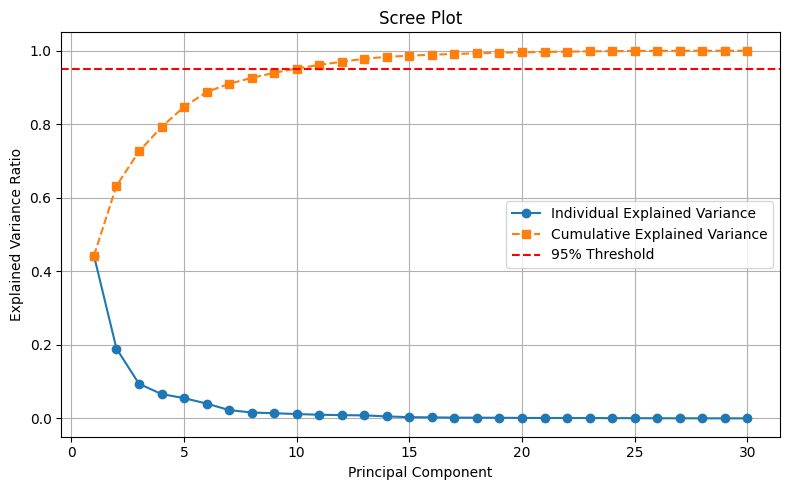


Number of components retained to explain 95% variance: 10

🔹 KNN on Original Data
Accuracy: 0.9707602339181286
              precision    recall  f1-score   support

   malignant       1.00      0.92      0.96        64
      benign       0.96      1.00      0.98       107

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

🔹 KNN on PCA-Transformed Data
Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

   malignant       0.97      0.89      0.93        64
      benign       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



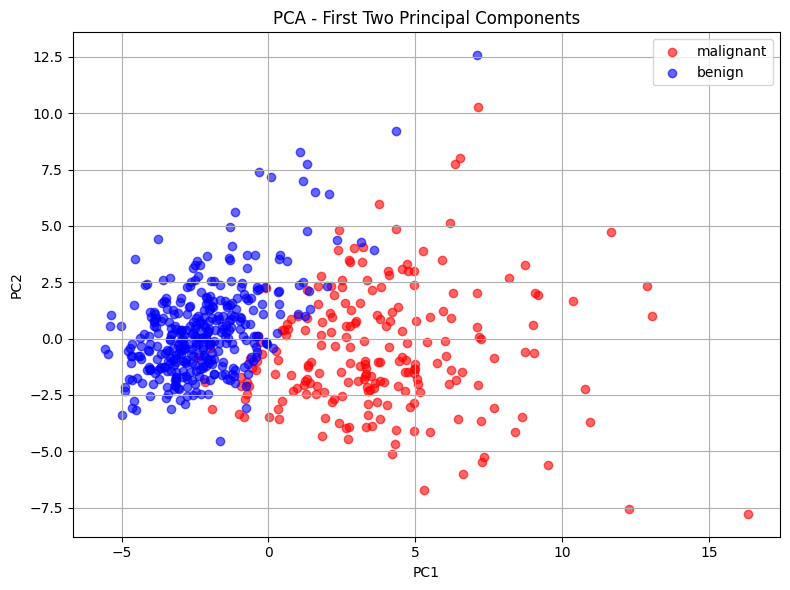

In [4]:
# Question 8 : PCA + KNN with Variance Analysis and Visualization Task: 1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()). 2. Apply PCA and plot the scree plot (explained variance ratio). 3. Retain 95% variance and transform the dataset. 4. Train KNN on the original data and PCA-transformed data, then compare accuracy.5. Visualize the first two principal components using a scatter plot (color by class).

# Answer:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Standardize the data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA and plot scree plot
pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Individual Explained Variance')
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='s', linestyle='--', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Retain 95% variance and transform dataset
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)

print(f"\nNumber of components retained to explain 95% variance: {pca_95.n_components_}")

# Step 4: Train KNN on original vs PCA-transformed data
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_pca_train, X_pca_test = train_test_split(X_pca, test_size=0.3, random_state=42, stratify=y)

# Train KNN on original data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_orig = knn_original.predict(X_test)

# Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)
y_pred_pca = knn_pca.predict(X_pca_test)

# Evaluation
print("\n🔹 KNN on Original Data")
print("Accuracy:", accuracy_score(y_test, y_pred_orig))
print(classification_report(y_test, y_pred_orig, target_names=target_names))

print("🔹 KNN on PCA-Transformed Data")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca, target_names=target_names))

# Step 5: Visualize first two principal components
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1], ['red', 'blue'], target_names):
    plt.scatter(X_2d[y == target, 0], X_2d[y == target, 1], alpha=0.6, label=label, c=color)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - First Two Principal Components')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Mean Squared Error (Euclidean, K=5): 4803.9056
Mean Squared Error (Manhattan, K=5): 5210.2258


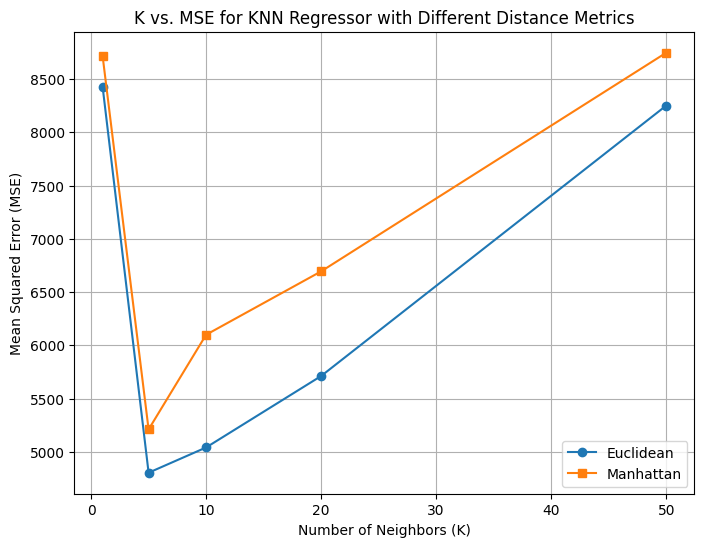

In [5]:
# Question 9:KNN Regressor with Distance Metrics and K-Value Analysis Task: 1. Generate a synthetic regression dataset (sklearn.datasets.make_regression(n_samples=500, n_features=10)). 2. Train a KNN regressor with: a. Euclidean distance (K=5) b. Manhattan distance (K=5) c. Compare Mean Squared Error (MSE) for both. 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


# Answer:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2a: Train KNN regressor with Euclidean distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euc = knn_euclidean.predict(X_test)
mse_euc = mean_squared_error(y_test, y_pred_euc)

# Step 2b: Train KNN regressor with Manhattan distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_man = knn_manhattan.predict(X_test)
mse_man = mean_squared_error(y_test, y_pred_man)

print(f"Mean Squared Error (Euclidean, K=5): {mse_euc:.4f}")
print(f"Mean Squared Error (Manhattan, K=5): {mse_man:.4f}")

# Step 3: Test multiple K values and plot K vs. MSE
k_values = [1, 5, 10, 20, 50]
mse_euclidean_list = []
mse_manhattan_list = []

for k in k_values:
    # Euclidean
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_euclidean_list.append(mean_squared_error(y_test, y_pred))

    # Manhattan
    knn = KNeighborsRegressor(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_manhattan_list.append(mean_squared_error(y_test, y_pred))

# Plot K vs MSE
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_euclidean_list, marker='o', label='Euclidean')
plt.plot(k_values, mse_manhattan_list, marker='s', label='Manhattan')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('K vs. MSE for KNN Regressor with Different Distance Metrics')
plt.legend()
plt.grid(True)
plt.show()


Missing values before imputation:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Missing values after imputation:
0
Algorithm: brute | Training time: 0.0026s | Accuracy: 0.7359
Algorithm: kd_tree | Training time: 0.0020s | Accuracy: 0.7359
Algorithm: ball_tree | Training time: 0.0060s | Accuracy: 0.7359

Best performing algorithm: brute with accuracy 0.7359
Top 2 features used for visualization: ['Glucose', 'Insulin']


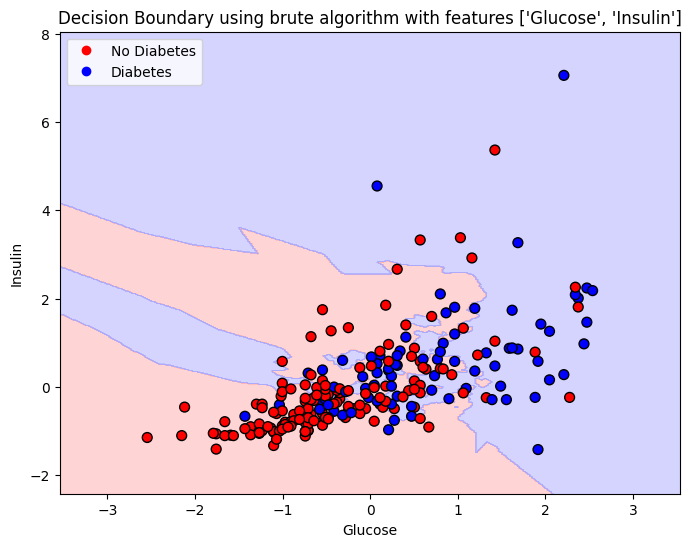

In [8]:
# Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data Task: 1. Load the Pima Indians Diabetes dataset (contains missing values). 2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values. 3. Train KNN using: a. Brute-force method b. KD-Tree c. Ball Tree 4. Compare their training time and accuracy. 5. Plot the decision boundary for the best-performing method (use 2 most important features). Dataset: Pima Indians Diabetes


# Answer:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Step 1: Load the Pima Indians Diabetes dataset
# Dataset URL from UCI ML Repository (CSV)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"

# The dataset has no header; columns based on UCI dataset description
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv(url, header=None, names=columns)

# Replace zeros in some columns with NaN to represent missing values (typical preprocessing)
# Features where zero is not valid (based on medical knowledge)
missing_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df[missing_features] = df[missing_features].replace(0, np.nan)

print(f"Missing values before imputation:\n{df.isna().sum()}")

# Step 2: KNN Imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(df.drop('Outcome', axis=1))
y = df['Outcome'].values

print(f"Missing values after imputation:\n{np.isnan(X_imputed).sum()}")  # Should be 0

# Scale features for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Train KNN using different algorithms and compare time and accuracy
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)

    start_time = time.time()
    knn.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    results[algo] = {'train_time': train_time, 'accuracy': accuracy}
    print(f"Algorithm: {algo} | Training time: {train_time:.4f}s | Accuracy: {accuracy:.4f}")

# Step 4: Find the best-performing method
best_algo = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBest performing algorithm: {best_algo} with accuracy {results[best_algo]['accuracy']:.4f}")

# Step 5: Plot decision boundary for the best method using 2 most important features
# Feature importance is not straightforward with KNN, so we use correlation with target or domain knowledge.
# For simplicity, we'll use the two features with highest absolute correlation with the target.

# Compute correlations with target
df_imputed = pd.DataFrame(X_imputed, columns=columns[:-1])
df_imputed['Outcome'] = y
correlations = df_imputed.corr()['Outcome'].abs().sort_values(ascending=False)
top2_features = correlations.index[1:3].tolist()  # skip 'Outcome' itself

print(f"Top 2 features used for visualization: {top2_features}")

# Extract those two features (scaled)
X_vis = df_imputed[top2_features].values
X_vis_scaled = scaler.fit_transform(X_vis)

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Train best model on 2 features
knn_best_2f = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best_2f.fit(X_train_vis, y_train_vis)

# Plot decision boundary function
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # step size in mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ['red', 'blue']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=50)
    plt.xlabel(top2_features[0])
    plt.ylabel(top2_features[1])
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=['No Diabetes', 'Diabetes'])
    plt.show()

plot_decision_boundary(X_test_vis, y_test_vis, knn_best_2f, f"Decision Boundary using {best_algo} algorithm with features {top2_features}")
